In [8]:
!conda env list
!touch image_processing.ipynb
!pwd

# conda environments:
#
kaggle2017               /Users/szalmaf/anaconda/envs/kaggle2017
kaggle2017-2.7        *  /Users/szalmaf/anaconda/envs/kaggle2017-2.7
root                     /Users/szalmaf/anaconda

/Users/szalmaf/Documents/GitHub/Training Statistics/fastai_Deep-Learning/mySolution


In [2]:
%matplotlib inline
import utils; reload(utils)
from utils import *

Using Theano backend.


## Simple linear regression in terms of a neural network: x -> y

In [3]:
# indep variable
x = np.array(range(30))/30.

In [16]:
# noise 
d = (random(30) - 0.5)/2.
# response + noise
y = 1. + 2. * x + d 

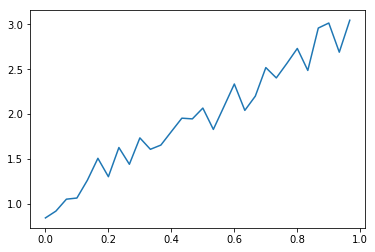

In [17]:
plt.plot(x,y)

In [18]:
# build model: one (dense) layer nn, 1 output node, 1 input node
lm = Sequential([Dense(1, input_shape=(1,))])
# Use stochastic gradient descent (SGD) and Mean Squared Error (MSE) as loss function
lm.compile(optimizer=SGD(lr=0.1), loss='mse') 
lm.model.summary() # 2 fitting parameters a (alpha, intersection), b (beta)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_input_2 (InputLayer)       (None, 1)             0                                            
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 1)             2           dense_input_2[0][0]              
Total params: 2
Trainable params: 2
Non-trainable params: 0
____________________________________________________________________________________________________


In [36]:
lm.evaluate(x, y, verbose=0)

0.017564596608281136

In [37]:
lm.fit(x, y, nb_epoch=80, batch_size=30)

Epoch 1/80
30/30 [==============================] - 0s - loss: 0.0176
Epoch 2/80
30/30 [==============================] - 0s - loss: 0.0176
Epoch 3/80
30/30 [==============================] - 0s - loss: 0.0175
Epoch 4/80
30/30 [==============================] - 0s - loss: 0.0175
Epoch 5/80
30/30 [==============================] - 0s - loss: 0.0175
Epoch 6/80
30/30 [==============================] - 0s - loss: 0.0175
Epoch 7/80
30/30 [==============================] - 0s - loss: 0.0175
Epoch 8/80
30/30 [==============================] - 0s - loss: 0.0175
Epoch 9/80
30/30 [==============================] - 0s - loss: 0.0175
Epoch 10/80
30/30 [==============================] - 0s - loss: 0.0175
Epoch 11/80
30/30 [==============================] - 0s - loss: 0.0174
Epoch 12/80
30/30 [==============================] - 0s - loss: 0.0174
Epoch 13/80
30/30 [==============================] - 0s - loss: 0.0174
Epoch 14/80
30/30 [==============================] - 0s - loss: 0.0174
Epoch 15/80
30/

In [38]:
a = lm.get_weights()[1][0]; b = lm.get_weights()[0][0][0]

In [39]:
def lin(a,b,x): return a + b * x

In [40]:
fig = plt.figure(dpi=100, figsize=(5,4))
plt.scatter(x,y)
line, = plt.plot(x, lin(a, b, x))
plt.close()

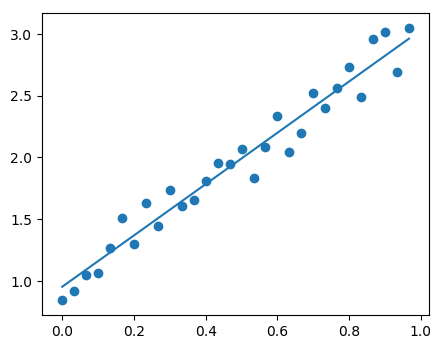

In [41]:
fig

In [43]:
a

0.95207882

## Multiple linear regression: (x1, x2) -> y

In [45]:
# 30 by 2 matrix containing x1 and x2 in its two columns
x = np.transpose(np.array((range(30), permutation(range(30))))/30.)

In [98]:
# Add a small perturbation over perfect linear relationship bwn indep vars (x1,x2) and the response (y)
d = (random(30) - 0.5)/2.
# Response variable
y = np.matmul(x, [2., 3.]) + 1. + d

In [99]:
x[:5]

array([[ 0.    ,  0.9333],
       [ 0.0333,  0.    ],
       [ 0.0667,  0.9   ],
       [ 0.1   ,  0.3   ],
       [ 0.1333,  0.5667]])

In [100]:
# Set up 1-layer neural network, 1 output and 2 input neurons
lm2 = Sequential([Dense(1, input_shape=(2,))])
# Use stochastic gradient descent (SGD),  and mean squared error (MSE) loss; MSE is *terrible* loss fn for optimization
lm2.compile(optimizer=SGD(lr=0.1), loss='mse')

In [105]:
lm2.evaluate(x, y, verbose=0)

0.041306339204311371

In [118]:
%time lm2.fit(x, y, nb_epoch=80, batch_size=900)

Epoch 1/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 2/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 3/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 4/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 5/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 6/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 7/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 8/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 9/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 10/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 11/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 12/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 13/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 14/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 15/80
30/

In [119]:
lm2.evaluate(x, y, verbose=0)

0.016848349943757057

In [120]:
lm2.get_weights() # MSE cannot get the fitting parameters right

[array([[ 2.097 ],
        [ 2.9163]], dtype=float32), array([ 1.0033], dtype=float32)]

In [122]:
lm2.model.summary() # 3 parameters a, b1, b2

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_input_5 (InputLayer)       (None, 2)             0                                            
____________________________________________________________________________________________________
dense_5 (Dense)                  (None, 1)             3           dense_input_5[0][0]              
Total params: 3
Trainable params: 3
Non-trainable params: 0
____________________________________________________________________________________________________
